This file is for the Kaggle competition "Predict CO2 Emissions in Rwanda" The due date is Aug 21, 2023 for official competition.

Source of the Kaggle Comp is: https://www.kaggle.com/competitions/playground-series-s3e20/data

Goal: Predict CO2 emissions from 2022 to 2022 Nov

In [1]:
import pandas as pd
import zipfile
import sklearn as sk
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [2]:
zf = zipfile.ZipFile("Data/playground-series-s3e20.zip")

In [3]:
zf.namelist()

['sample_submission.csv', 'test.csv', 'train.csv']

In [4]:
df_train = pd.read_csv(zf.open("train.csv"))
df_test = pd.read_csv(zf.open("test.csv"))

In [5]:
df_train.sample(5)
df_train.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [6]:
df_train.head(10)


,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
5,ID_-0.510_29.290_2019_05,-0.51,29.29,2019,5,0.000294,0.871713,0.000242,0.227656,-13.453690,...,5530.354546,49846.001010,4495.301362,7.556143,0.250228,30.128401,37.007020,-137.388719,21.157820,4.310819
6,ID_-0.510_29.290_2019_06,-0.51,29.29,2019,6,-0.000285,0.791956,-0.000226,0.119397,72.198647,...,4378.614648,58804.276563,3537.050659,10.493107,0.240828,4.585368,30.491541,-128.196338,21.721202,4.269334
7,ID_-0.510_29.290_2019_07,-0.51,29.29,2019,7,-0.000016,0.976311,-0.000016,0.106799,-100.956055,...,3468.924146,63697.007267,2597.071563,20.533600,0.250168,16.374829,35.840248,-122.250699,20.432005,4.251361
8,ID_-0.510_29.290_2019_08,-0.51,29.29,2019,8,-0.000115,0.796941,-0.000101,0.164971,-40.179074,...,3160.264670,67222.556159,2530.851476,24.253928,0.260543,-12.021751,42.688789,-114.296369,22.365602,4.281937
9,ID_-0.510_29.290_2019_09,-0.51,29.29,2019,9,0.000056,0.998541,0.000014,0.157726,-100.108744,...,4141.073340,60298.717969,3510.293652,13.813379,0.289295,-66.258392,28.596211,-105.687177,21.084021,4.352933


In [7]:
df_train['Location'] = [str(x) + '_' + str(y) for x, y in zip(df_train.latitude, df_train.longitude)]

<Axes: xlabel='latitude', ylabel='longitude'>

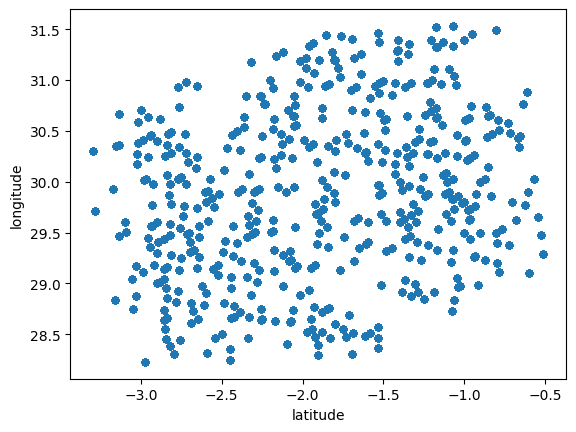

In [8]:
df_train.plot(x="latitude", y ="longitude", kind ="scatter" )

<Axes: xlabel='Location', ylabel='emission'>

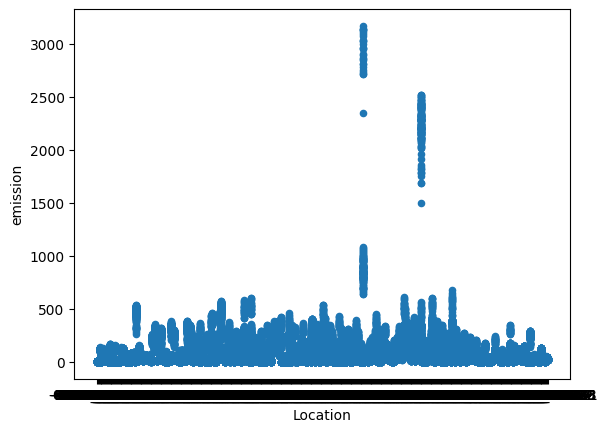

In [9]:
df_train.plot(x="Location", y ="emission", kind ="scatter" )

In [10]:
df_train.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [11]:
df_train = df_train.dropna(thresh= 79023, axis=1)
df_train.describe()

,latitude,longitude,year,week_no,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,81.940552
std,0.694522,0.810375,0.816502,15.297155,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,3167.768000


In [12]:
df_test = df_test.dropna(thresh= 24353, axis=1)
df_test.describe()

,latitude,longitude,year,week_no
count,24353.000000,24353.000000,24353.0,24353.000000
mean,-1.891072,29.880155,2022.0,24.000000
std,0.694532,0.810387,0.0,14.142426
min,-3.299000,28.228000,2022.0,0.000000
25%,-2.451000,29.262000,2022.0,12.000000
50%,-1.882000,29.883000,2022.0,24.000000
75%,-1.303000,30.471000,2022.0,36.000000
max,-0.510000,31.532000,2022.0,48.000000


In [13]:
#Bringing the week of Year and year together

#df_train["ToY"] = pd.concat(df_train["week_no"] + ' ' + df_train["year"])
#df_train["ToY"] = [str(x) + ' ' + y for x, y in zip(df_train["week_no"].astype(str), df_train["year"].astype(str))]



In [14]:
df_train["atime"] = df_train.apply(lambda row: time.asctime(time.strptime('{} {} 1'.format(row["year"], row["week_no"]), '%Y %W %w')), axis=1)

df_train.sample(5)

C:\Users\heroa\AppData\Local\Temp\ipykernel_14516\1678610433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["atime"] = df_train.apply(lambda row: time.asctime(time.strptime('{} {} 1'.format(row["year"], row["week_no"]), '%Y %W %w')), axis=1)


,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,emission,Location,atime
40803,ID_-1.911_30.189_2020_46,-1.911,30.189,2020,46,131.184460,-1.911_30.189,Mon Nov 16 00:00:00 2020
69247,ID_-2.818_29.582_2020_29,-2.818,29.582,2020,29,26.767350,-2.818_29.582,Mon Jul 20 00:00:00 2020
20409,ID_-1.327_30.973_2020_04,-1.327,30.973,2020,4,83.245800,-1.327_30.973,Mon Jan 27 00:00:00 2020
17328,ID_-1.225_30.975_2021_50,-1.225,30.975,2021,50,229.950840,-1.225_30.975,Mon Dec 13 00:00:00 2021
35290,ID_-1.792_30.408_2021_45,-1.792,30.408,2021,45,56.201427,-1.792_30.408,Mon Nov 8 00:00:00 2021


<Axes: xlabel='atime'>

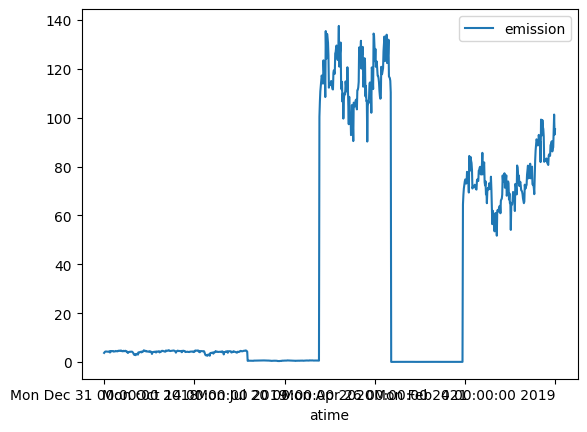

In [15]:
df_train.iloc[0:1000].plot(x="atime", y ="emission", kind = 'line')

<Axes: xlabel='week'>

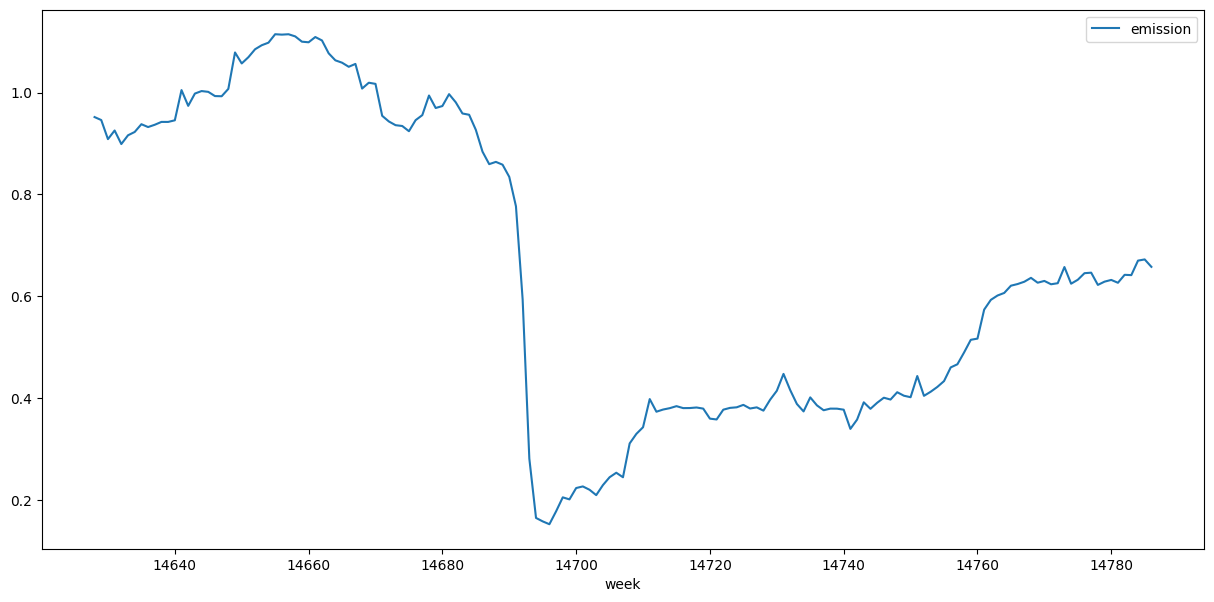

In [16]:
#grpd = df_train.groupby("Location")

example_loc = df_train[df_train.Location == '-1.17_29.33']

example_loc.plot( y ="emission", kind = 'line', xlabel='week', figsize=(15,7))
#print(example_loc)



In [17]:
df_train.dtypes

ID_LAT_LON_YEAR_WEEK     object
latitude                float64
longitude               float64
year                      int64
week_no                   int64
emission                float64
Location                 object
atime                    object
dtype: object

In [18]:
df_train['month'] = df_train['week_no']//4 
df_test['month'] = df_test['week_no']//4
    
df_train['is_covid'] = (df_train['year'] == 2020) & (df_train['month'] > 2) | (df_train['year'] == 2021) & (df_train['month'] == 1)

df_test['is_covid'] = (df_test['year'] == 2020) & (df_test['month'] > 2) | (df_test['year'] == 2021) & (df_test['month'] == 1)

C:\Users\heroa\AppData\Local\Temp\ipykernel_14516\3380977196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['month'] = df_train['week_no']//4
C:\Users\heroa\AppData\Local\Temp\ipykernel_14516\3380977196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['is_covid'] = (df_train['year'] == 2020) & (df_train['month'] > 2) | (df_train['year'] == 2021) & (df_train['month'] == 1)


In [19]:
#Features
x = df_train.drop(["ID_LAT_LON_YEAR_WEEK","atime", "emission", "Location"], axis = 1)

#labels
y = df_train["emission"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 25)

rf_model = RandomForestRegressor(random_state = 25)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

print(mean_squared_error(y_test, y_pred,squared=False))
print(rf_model.score(x_train,y_train))

13.401583945552403
0.9986448193850176


In [22]:
#Check feature Importance
importances = rf_model.feature_importances_
columns = x.columns
i = 0

while i< len(columns):
    print (f" The importance of feature '{columns[i]}' is {round(importances[i]*100, 2)}%.")
    i += 1


 The importance of feature 'latitude' is 17.18%.
 The importance of feature 'longitude' is 73.51%.
 The importance of feature 'year' is 0.35%.
 The importance of feature 'week_no' is 8.02%.
 The importance of feature 'month' is 0.56%.
 The importance of feature 'is_covid' is 0.39%.


In [23]:
df_test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,month,is_covid
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,0,False
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0,False
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0,False
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0,False
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,1,False


In [24]:
x_testSet = df_test.drop(["ID_LAT_LON_YEAR_WEEK"], axis = 1)

predictions = rf_model.predict(x_testSet)

In [25]:
#Create Submission File

sub_file = pd.DataFrame({"ID_LAT_LON_YEAR_WEEK": df_test.ID_LAT_LON_YEAR_WEEK, "emission": predictions})

sub_file.describe()

,emission
count,24353.000000
mean,82.462503
std,146.302481
min,0.000000
25%,10.022604
50%,46.144019
75%,109.466853
max,2875.467415


In [26]:
#Create File

sub_file.to_csv('SecondSubmission.csv', index=False)